# Daily Footfall Analysis

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
df = pd.read_csv('Daily footfall.csv', header=0)

In [3]:
df.head()

,Date,Footfall
0,1/4/2009,29518.0
1,1/4/2009,18659.0
2,2/4/2009,25501.0
3,2/4/2009,26938.0
4,3/4/2009,32751.0


In [4]:
df.index.dtype

dtype('int64')

### Exploratory data analysis on the datasets

In [5]:
n_df = df['Date'].str.split('/', n = 2, expand = True)

In [7]:
n_df = n_df.rename(columns={0:'day', 1:'month', 2:'year'})
cols = ["year","month","day"]
n_df['Dates'] = n_df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
n_df['Date'] = pd.to_datetime(n_df['Dates'], format='%Y-%m-%d')

In [8]:
new_df = pd.concat([n_df.iloc[:, 4:5], df.iloc[:, 1:2]], axis=1)

In [9]:
new_df.head()

,Date,Footfall
0,2009-04-01,29518.0
1,2009-04-01,18659.0
2,2009-04-02,25501.0
3,2009-04-02,26938.0
4,2009-04-03,32751.0


In [10]:
new_df.isnull().values.any()

True

In [11]:
new_df = new_df.fillna(new_df.mean())

<ipython-input-11-5640e8055373>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  new_df = new_df.fillna(new_df.mean())


In [13]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13469 entries, 0 to 13468
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      13469 non-null  datetime64[ns]
 1   Footfall  13469 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 210.6 KB


In [14]:
new = (new_df.groupby('Date')['Footfall'].sum()).to_frame().reset_index()

In [15]:
new.head()

,Date,Footfall
0,2009-03-30,43868.0
1,2009-03-31,47724.0
2,2009-04-01,48177.0
3,2009-04-02,52439.0
4,2009-04-03,54633.0


### Feature Engineering

#### Assumptions

Let's Assume that the Daily footfall data is of some shopping centre. Due to the increase in online shopping there is high decrease in the people visiting the market. 
- There is a decrease of people visiting the market over the years.
- People visit market in the festival days. More Footfall in Chirstmas and New year.
- People like to shop in the week days and end of the month.

In [30]:
features = new

In [18]:
features['Year'] = new['Date'].dt.year
features['Month'] = new['Date'].dt.month
features['Day'] = new['Date'].dt.day
features['Day_of_week'] = new['Date'].dt.dayofweek

In [19]:
features['Footfall 1 day ago'] = new['Footfall'].shift(1)
features['Footfall 1 year ago'] = new['Footfall'].shift(365)

In [32]:
features.head()

,Date,Footfall,Year,Month,Day,Day_of_week,Footfall 1 day ago,Footfall 1 year ago
0,2009-03-30,43868.0,2009,3,30,0,NaN,NaN
1,2009-03-31,47724.0,2009,3,31,1,43868.0,NaN
2,2009-04-01,48177.0,2009,4,1,2,47724.0,NaN
3,2009-04-02,52439.0,2009,4,2,3,48177.0,NaN
4,2009-04-03,54633.0,2009,4,3,4,52439.0,NaN


### Visualization of data

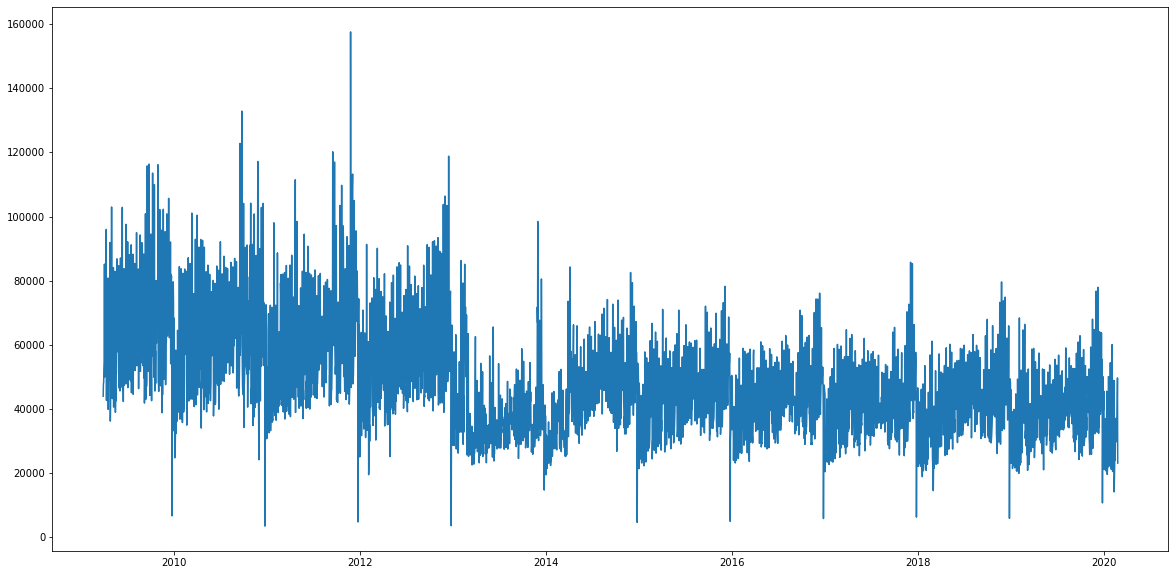

In [33]:
plt.subplots(figsize=(20, 10))
plt.plot(features['Date'], features['Footfall'])
plt.show()

<AxesSubplot:xlabel='Year,Month'>

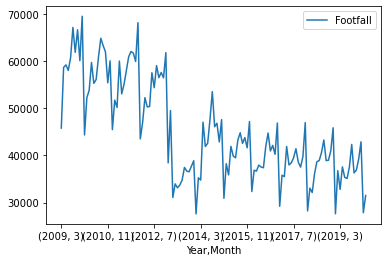

In [29]:
monthly_averages = features.groupby(["Year", "Month"]).aggregate({"Footfall":np.mean})
monthly_averages.plot()

Now let's see the data group by year and know how the footfall has been effected.

<AxesSubplot:xlabel='Year'>

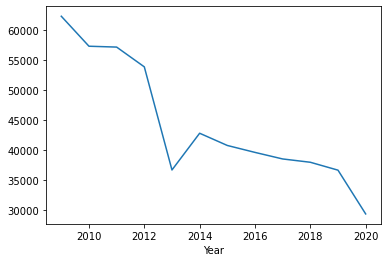

In [34]:
features.groupby('Year')['Footfall'].mean().plot()

Here we can see that the daily footfall is decreasing over the years. We can conclude that the online market is increasing rather than people themself visiting the market.

Here we see how the footfall has been effected in the monthly basis. 

<AxesSubplot:xlabel='Month'>

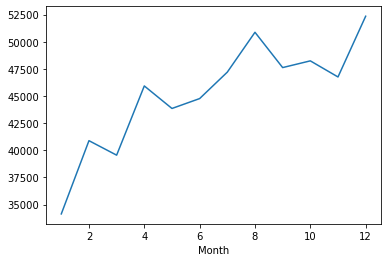

In [35]:
features.groupby('Month')['Footfall'].mean().plot()

From the above figure we can visualize that Footfall is more in the month where the festivals falls. We can see increase in February, April, December.
- Valentine's day and President's day fall on the month of February.
- Easter fall on the month of April.
- Christmas and New year fall on the month of December.

There is high increase of footfall on the month of August because there are many new migrant as a student for their higher education.

We see how the footfall has been effected on the daily and weekly basis

<AxesSubplot:xlabel='Day'>

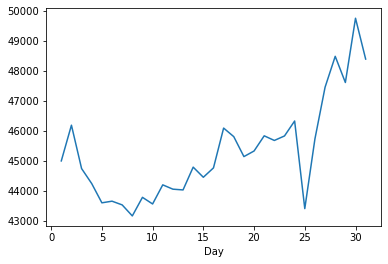

In [26]:
features.groupby('Day')['Footfall'].mean().plot()

<AxesSubplot:xlabel='Day_of_week'>

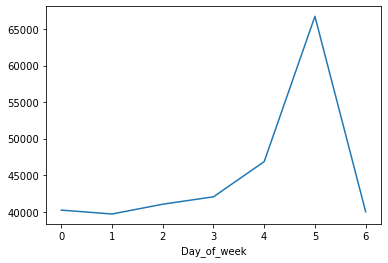

In [37]:
features.groupby('Day_of_week')['Footfall'].mean().plot()

<AxesSubplot:xlabel='Footfall', ylabel='Footfall 1 day ago'>

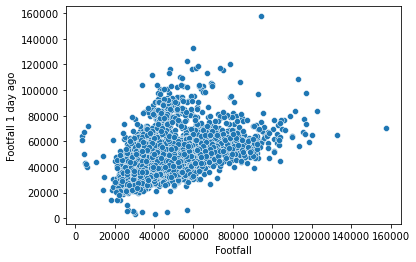

In [31]:
sns.scatterplot(x='Footfall', y='Footfall 1 day ago', data=features)

<AxesSubplot:xlabel='Footfall', ylabel='Footfall 1 year ago'>

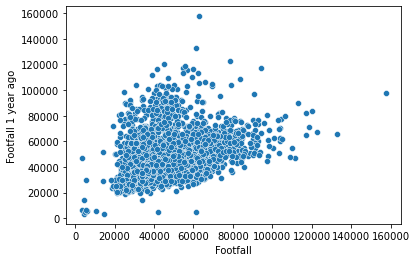

In [23]:
sns.scatterplot(x='Footfall', y='Footfall 1 year ago', data=features)